# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a>, який зберегли наприкінці попередньої роботи (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. Дослідити ознаки, побудувавши їх візуалізації
2. Порахувати кореляцію між всіма кількісними ознаками
3. Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. Візуально оцініть наявність та силу зв'язку між цими ознаками.   
4. Які кількісні ознаки можуть бути предикторами кількості викидів СО2?
5. Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити ознаки, побудувавши їх візуалізації</p>
</div>


Зчитую дані з файлу у датафрейм

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#  Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/clean_data2.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Будую графіки

In [ ]:
df = pd.read_csv(path)
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951.0,165114.116337,350,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,165114.116337,6020,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730000,527970,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076000,752610,22.045136


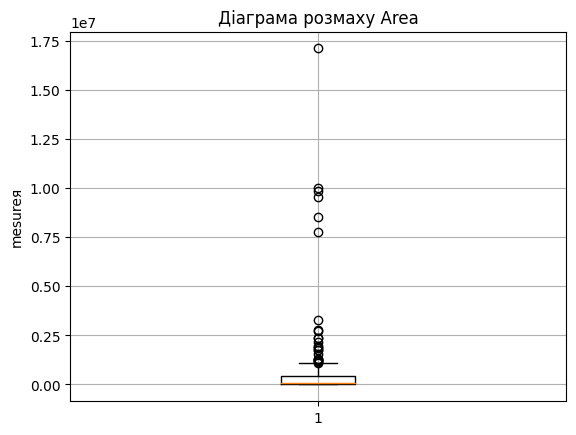

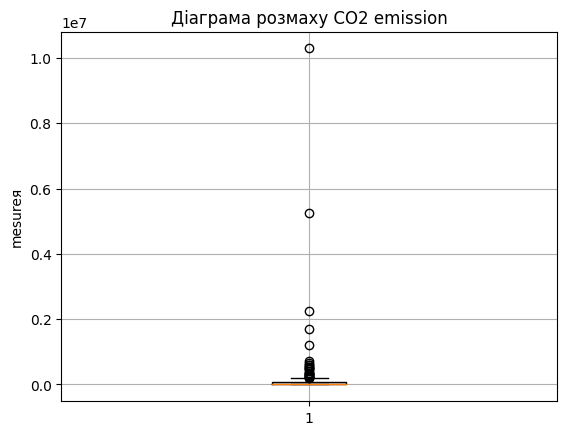

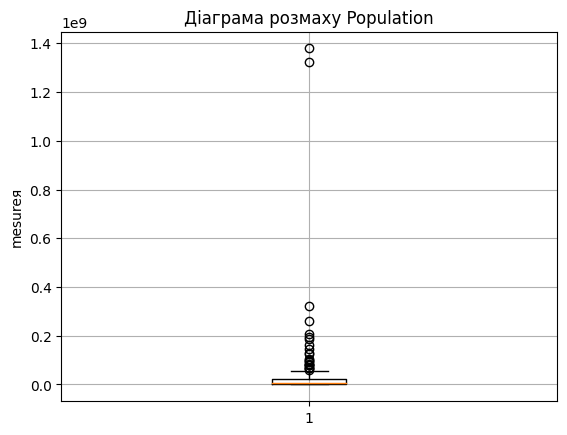

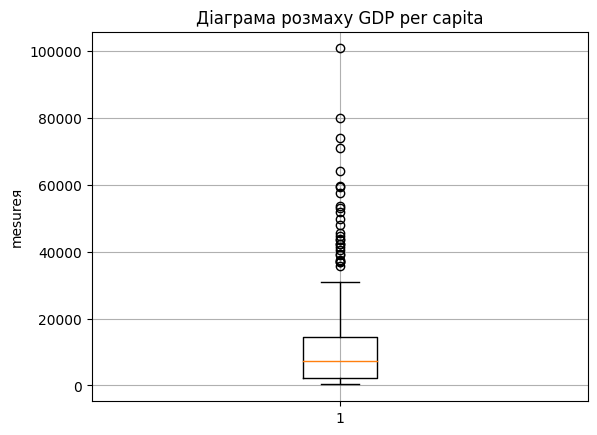

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

column_names = ['Area', 'CO2 emission', 'Population', 'GDP per capita']

for el in column_names:
  plt.boxplot(df[el])
  plt.title(f'Діаграма розмаху {el}')
  plt.ylabel('mesureя')
  plt.grid(True)
  plt.show()


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Порахувати кореляцію між всіма кількісними ознаками</p>
</div>


Рахую кореляцію між всіма кількісними ознаками

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        217 non-null    object 
 1   Region              217 non-null    object 
 2   GDP per capita      217 non-null    float64
 3   Population          217 non-null    float64
 4   CO2 emission        217 non-null    float64
 5   Area                217 non-null    int64  
 6   Population density  217 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 12.0+ KB


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df[['GDP per capita','Population','CO2 emission' ,'Area','Population density']].corr()

,GDP per capita,Population,CO2 emission,Area,Population density
GDP per capita,1.000000,-0.047759,0.089094,0.063861,0.243727
Population,-0.047759,1.000000,0.802232,0.453500,-0.028438
CO2 emission,0.089094,0.802232,1.000000,0.585512,-0.017490
Area,0.063861,0.453500,0.585512,1.000000,-0.064006
Population density,0.243727,-0.028438,-0.017490,-0.064006,1.000000


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. </p>
<p>Візуально оцініть наявність та силу зв'язку між цими ознаками.</p>
</div>


Будую діаграму розсіювання для кількісних ознак та 'CO2 emission'

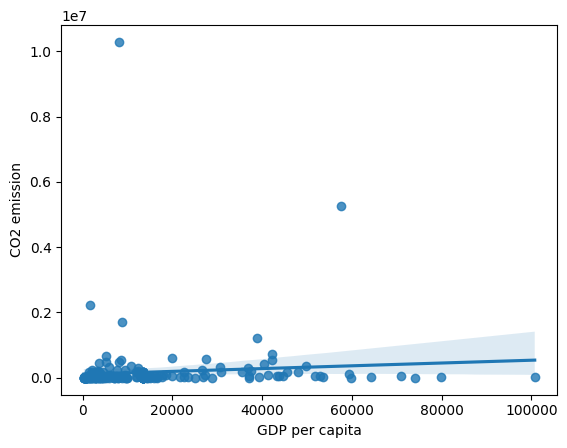

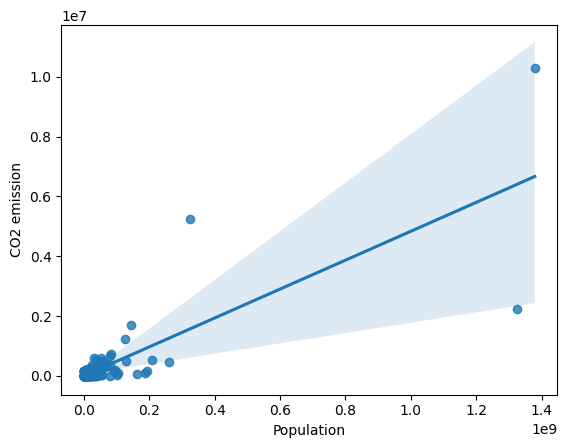

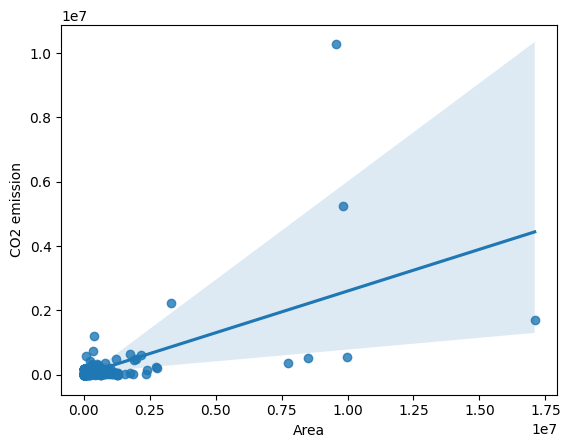

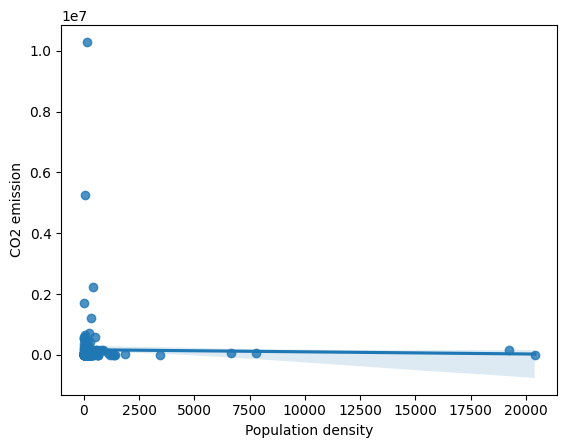

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

sns.regplot(x='GDP per capita',y='CO2 emission', data=df)
plt.show()
sns.regplot(x='Population',y='CO2 emission', data=df)
plt.show()
sns.regplot(x='Area',y='CO2 emission', data=df)
plt.show()
sns.regplot(x='Population density',y='CO2 emission', data=df)
plt.show()


Будую діаграму розмаху для 'CO2 emission' по регіонам

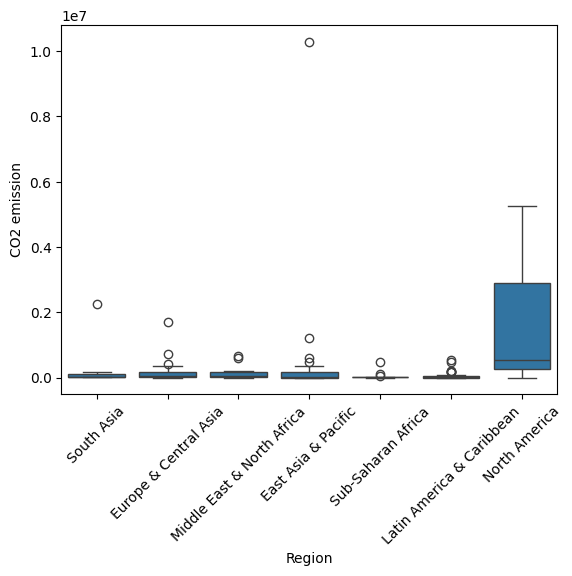

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
sns.boxplot(x='Region', y='CO2 emission', data=df)

plt.xticks(rotation=45)  # Обертання підписів осі X для зручності
plt.show()

<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Які кількісні ознаки можуть бути предикторами кількості викидів СО2?</p>
</div>


<p>Предикатами можуть бути 'population' та 'Area'</p>

Обчислюю коефіцієнт кореляції Пірсона та P-value для всіх кількісних змінних та 'CO2 emission'

In [ ]:
from scipy import stats

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
array = ['GDP per capita','Population','Area','Population density']

for el in array:
  pearson_coef, p_value = stats.pearsonr(df[el], df['CO2 emission'])
  print(el)
  print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )


GDP per capita
The Pearson Correlation Coefficient is 0.08909442180647847  with a P-value of P = 0.19105512270111474
Population
The Pearson Correlation Coefficient is 0.8022315895757172  with a P-value of P = 4.637918023642536e-50
Area
The Pearson Correlation Coefficient is 0.5855119221735577  with a P-value of P = 2.315747543725288e-21
Population density
The Pearson Correlation Coefficient is -0.017490379742797525  with a P-value of P = 0.7978111739090938


<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам</p>
</div>


Групую дані, щоб побачити чи впливає 'Region' на 'CO2 emission'.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
grouped =df[['Region', 'CO2 emission']].groupby(['Region'])
grouped.head()

,Region,CO2 emission
0,South Asia,9.809225e+03
1,Europe & Central Asia,5.716853e+03
2,Middle East & North Africa,1.454002e+05
3,East Asia & Pacific,1.651141e+05
4,Europe & Central Asia,4.620420e+02
5,Sub-Saharan Africa,3.476316e+04
6,Latin America & Caribbean,5.317150e+02
7,Latin America & Caribbean,2.040245e+05
8,Europe & Central Asia,5.529836e+03
9,Latin America & Caribbean,8.727460e+02


Скористаюсь функцією <code>f_oneway</code> з модуля "stats" для отримання F-test score та P-value.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

f_val, p_val = stats.f_oneway(grouped.get_group('South Asia')['CO2 emission'],
                              grouped.get_group('Europe & Central Asia')['CO2 emission'],
                              grouped.get_group('Middle East & North Africa')['CO2 emission'],
                              grouped.get_group('East Asia & Pacific')['CO2 emission'],
                              grouped.get_group('Sub-Saharan Africa')['CO2 emission'],
                              grouped.get_group('Latin America & Caribbean')['CO2 emission'],
                              grouped.get_group('North America')['CO2 emission'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 3.567709637673427 , P = 0.0021855506878927606


Результат із високим показником тесту, який показує сильну кореляцію, і P-value майже 0 , що передбачає впевнену статистичну значущість. Але чи означає це, що досліджувані групи сильно корелюють між собою?

Розглянемо їх окремо.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print("група '1'", stats.shapiro(grouped.get_group('Europe & Central Asia')['CO2 emission']))
print("група '2'", stats.shapiro(grouped.get_group('Sub-Saharan Africa')['CO2 emission']))
print("група '3'", stats.shapiro(grouped.get_group('Latin America & Caribbean')['CO2 emission']))
print("група '4'", stats.shapiro(grouped.get_group('East Asia & Pacific')['CO2 emission']))
print("група '5'", stats.shapiro(grouped.get_group('Middle East & North Africa')['CO2 emission']))
print("група '6'", stats.shapiro(grouped.get_group('South Asia')['CO2 emission']))
print("група '7'", stats.shapiro(grouped.get_group('North America')['CO2 emission']))

група '1' ShapiroResult(statistic=0.4698972702026367, pvalue=3.7022774711410744e-13)
група '2' ShapiroResult(statistic=0.21524322032928467, pvalue=1.385663315995678e-14)
група '3' ShapiroResult(statistic=0.5404197573661804, pvalue=2.83462864292261e-10)
група '4' ShapiroResult(statistic=0.22866499423980713, pvalue=1.0137837834836572e-12)
група '5' ShapiroResult(statistic=0.6643725633621216, pvalue=1.0225892765447497e-05)
група '6' ShapiroResult(statistic=0.47273802757263184, pvalue=4.837930646317545e-06)
група '7' ShapiroResult(statistic=0.8257257342338562, pvalue=0.17751876623135032)


Групи 1, 2, 3, 4, 5 і 6: статистика тесту є досить мала, а p-значення набагато менше 0.05, що означає, що ми відхиляємо нульову гіпотезу про нормальність розподілу даних для цих груп. Є помірні докази того, що кореляція є значною.
<br>

Група 7: статистика тесту більша, а p-значення більше 0.05, що свідчить про те, що ми не можемо відхилити нульову гіпотезу про нормальність розподілу даних для цієї групи. Немає доказів того, що кореляція є значною

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

Групування кількісної змінної в категорії було в попередній лабораторній роботі. Використайте функцію "cut"
</details>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<h2>Виконав студент групи ІП-24 <br> Денисенко В'ячеслав</h2>